In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv('PastHires.csv')

In [3]:
df.head(10)

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N
5,0,N,0,PhD,Y,Y,Y
6,5,Y,2,MS,N,Y,Y
7,3,N,1,BS,N,Y,Y
8,15,Y,5,BS,N,N,Y
9,0,N,0,BS,N,N,N


In [4]:
df.sort_values('Years Experience')

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
1,0,N,0,BS,Y,Y,Y
5,0,N,0,PhD,Y,Y,Y
9,0,N,0,BS,N,N,N
12,0,N,0,PhD,Y,N,Y
10,1,N,1,PhD,Y,N,N
3,2,Y,1,MS,Y,N,Y
7,3,N,1,BS,N,Y,Y
11,4,Y,1,BS,N,Y,Y
6,5,Y,2,MS,N,Y,Y
2,7,N,6,BS,N,N,N


In [5]:
df['Level of Education'].value_counts()

BS     7
PhD    4
MS     2
Name: Level of Education, dtype: int64

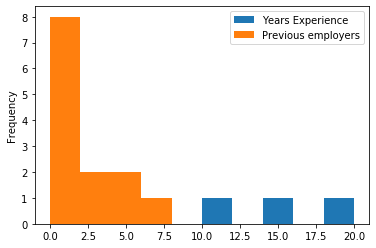

In [6]:
df.plot.hist()

In [46]:
from sklearn.decomposition import PCA as sklearnPCA
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score

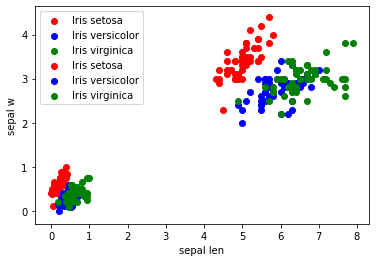

In [49]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, header=None)

y = data[4]
x = data.iloc[:,0:4]

plt.scatter(x[y=='Iris-setosa'].iloc[:,0], x[y=='Iris-setosa'].iloc[:,1], label='Iris setosa', c='red')
plt.scatter(x[y=='Iris-versicolor'].iloc[:,0], x[y=='Iris-versicolor'].iloc[:,1], label='Iris versicolor', c='blue')
plt.scatter(x[y=='Iris-virginica'].iloc[:,0], x[y=='Iris-virginica'].iloc[:,1], label='Iris virginica', c='green')
plt.legend()
plt.xlabel('sepal len')
plt.ylabel('sepal w')

x_norm = (x - x.min())/(x.max() - x.min())

plt.scatter(x_norm[y=='Iris-setosa'].iloc[:,0], x_norm[y=='Iris-setosa'].iloc[:,1], label='Iris setosa', c='red')
plt.scatter(x_norm[y=='Iris-versicolor'].iloc[:,0], x_norm[y=='Iris-versicolor'].iloc[:,1], label='Iris versicolor', c='blue')
plt.scatter(x_norm[y=='Iris-virginica'].iloc[:,0], x_norm[y=='Iris-virginica'].iloc[:,1], label='Iris virginica', c='green')
plt.legend()
plt.xlabel('sepal len')
plt.ylabel('sepal w')
plt.show()

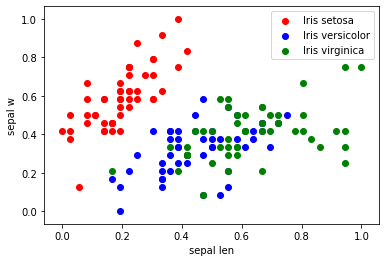

In [20]:
pca = sklearnPCA(n_components=2)
transformed = pd.DataFrame(pca.fit_transform(x_norm))

In [21]:
df = pd.read_csv('wine.data.csv')


In [22]:
label = df['Label']
del df['Label']
df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


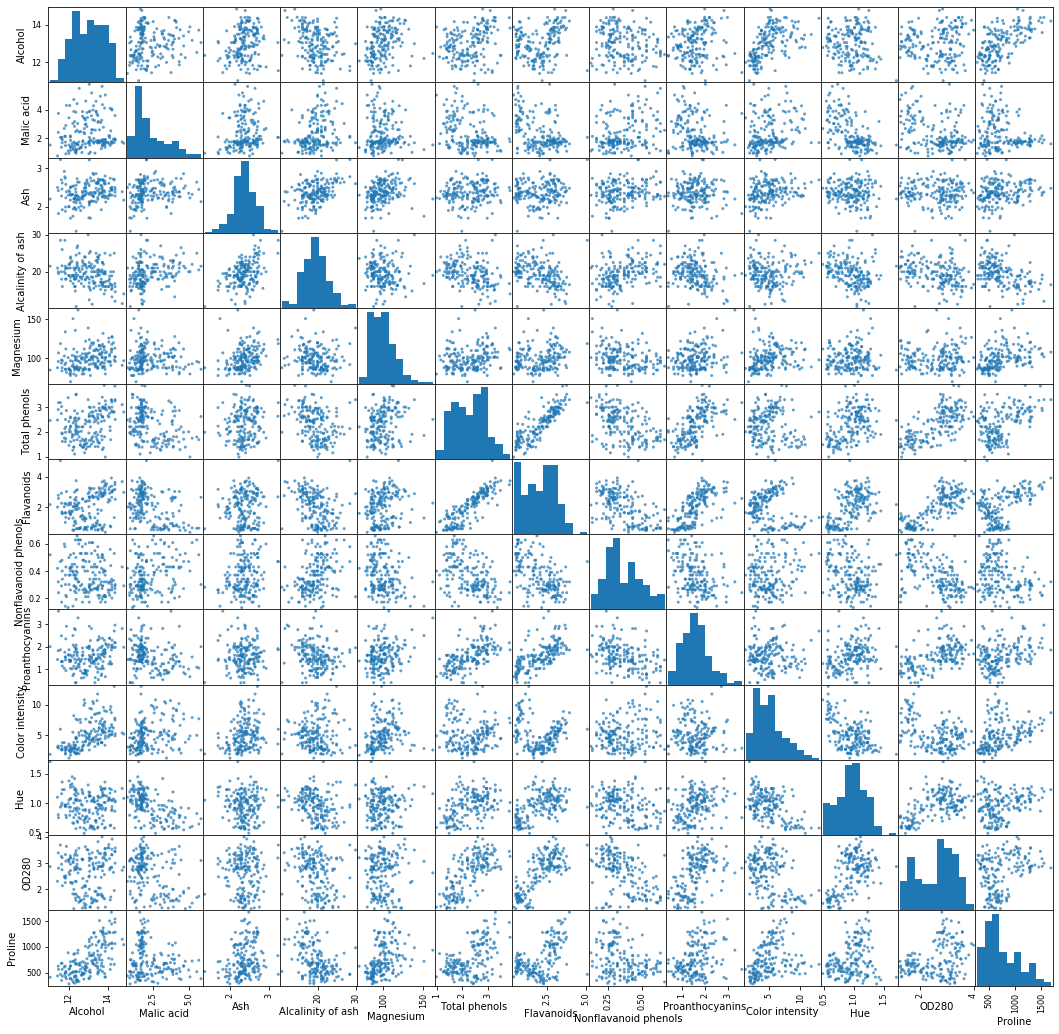

In [23]:
from pandas.plotting import scatter_matrix as sm
sm(df, alpha = 0.7, figsize = (18,18))
plt.show()

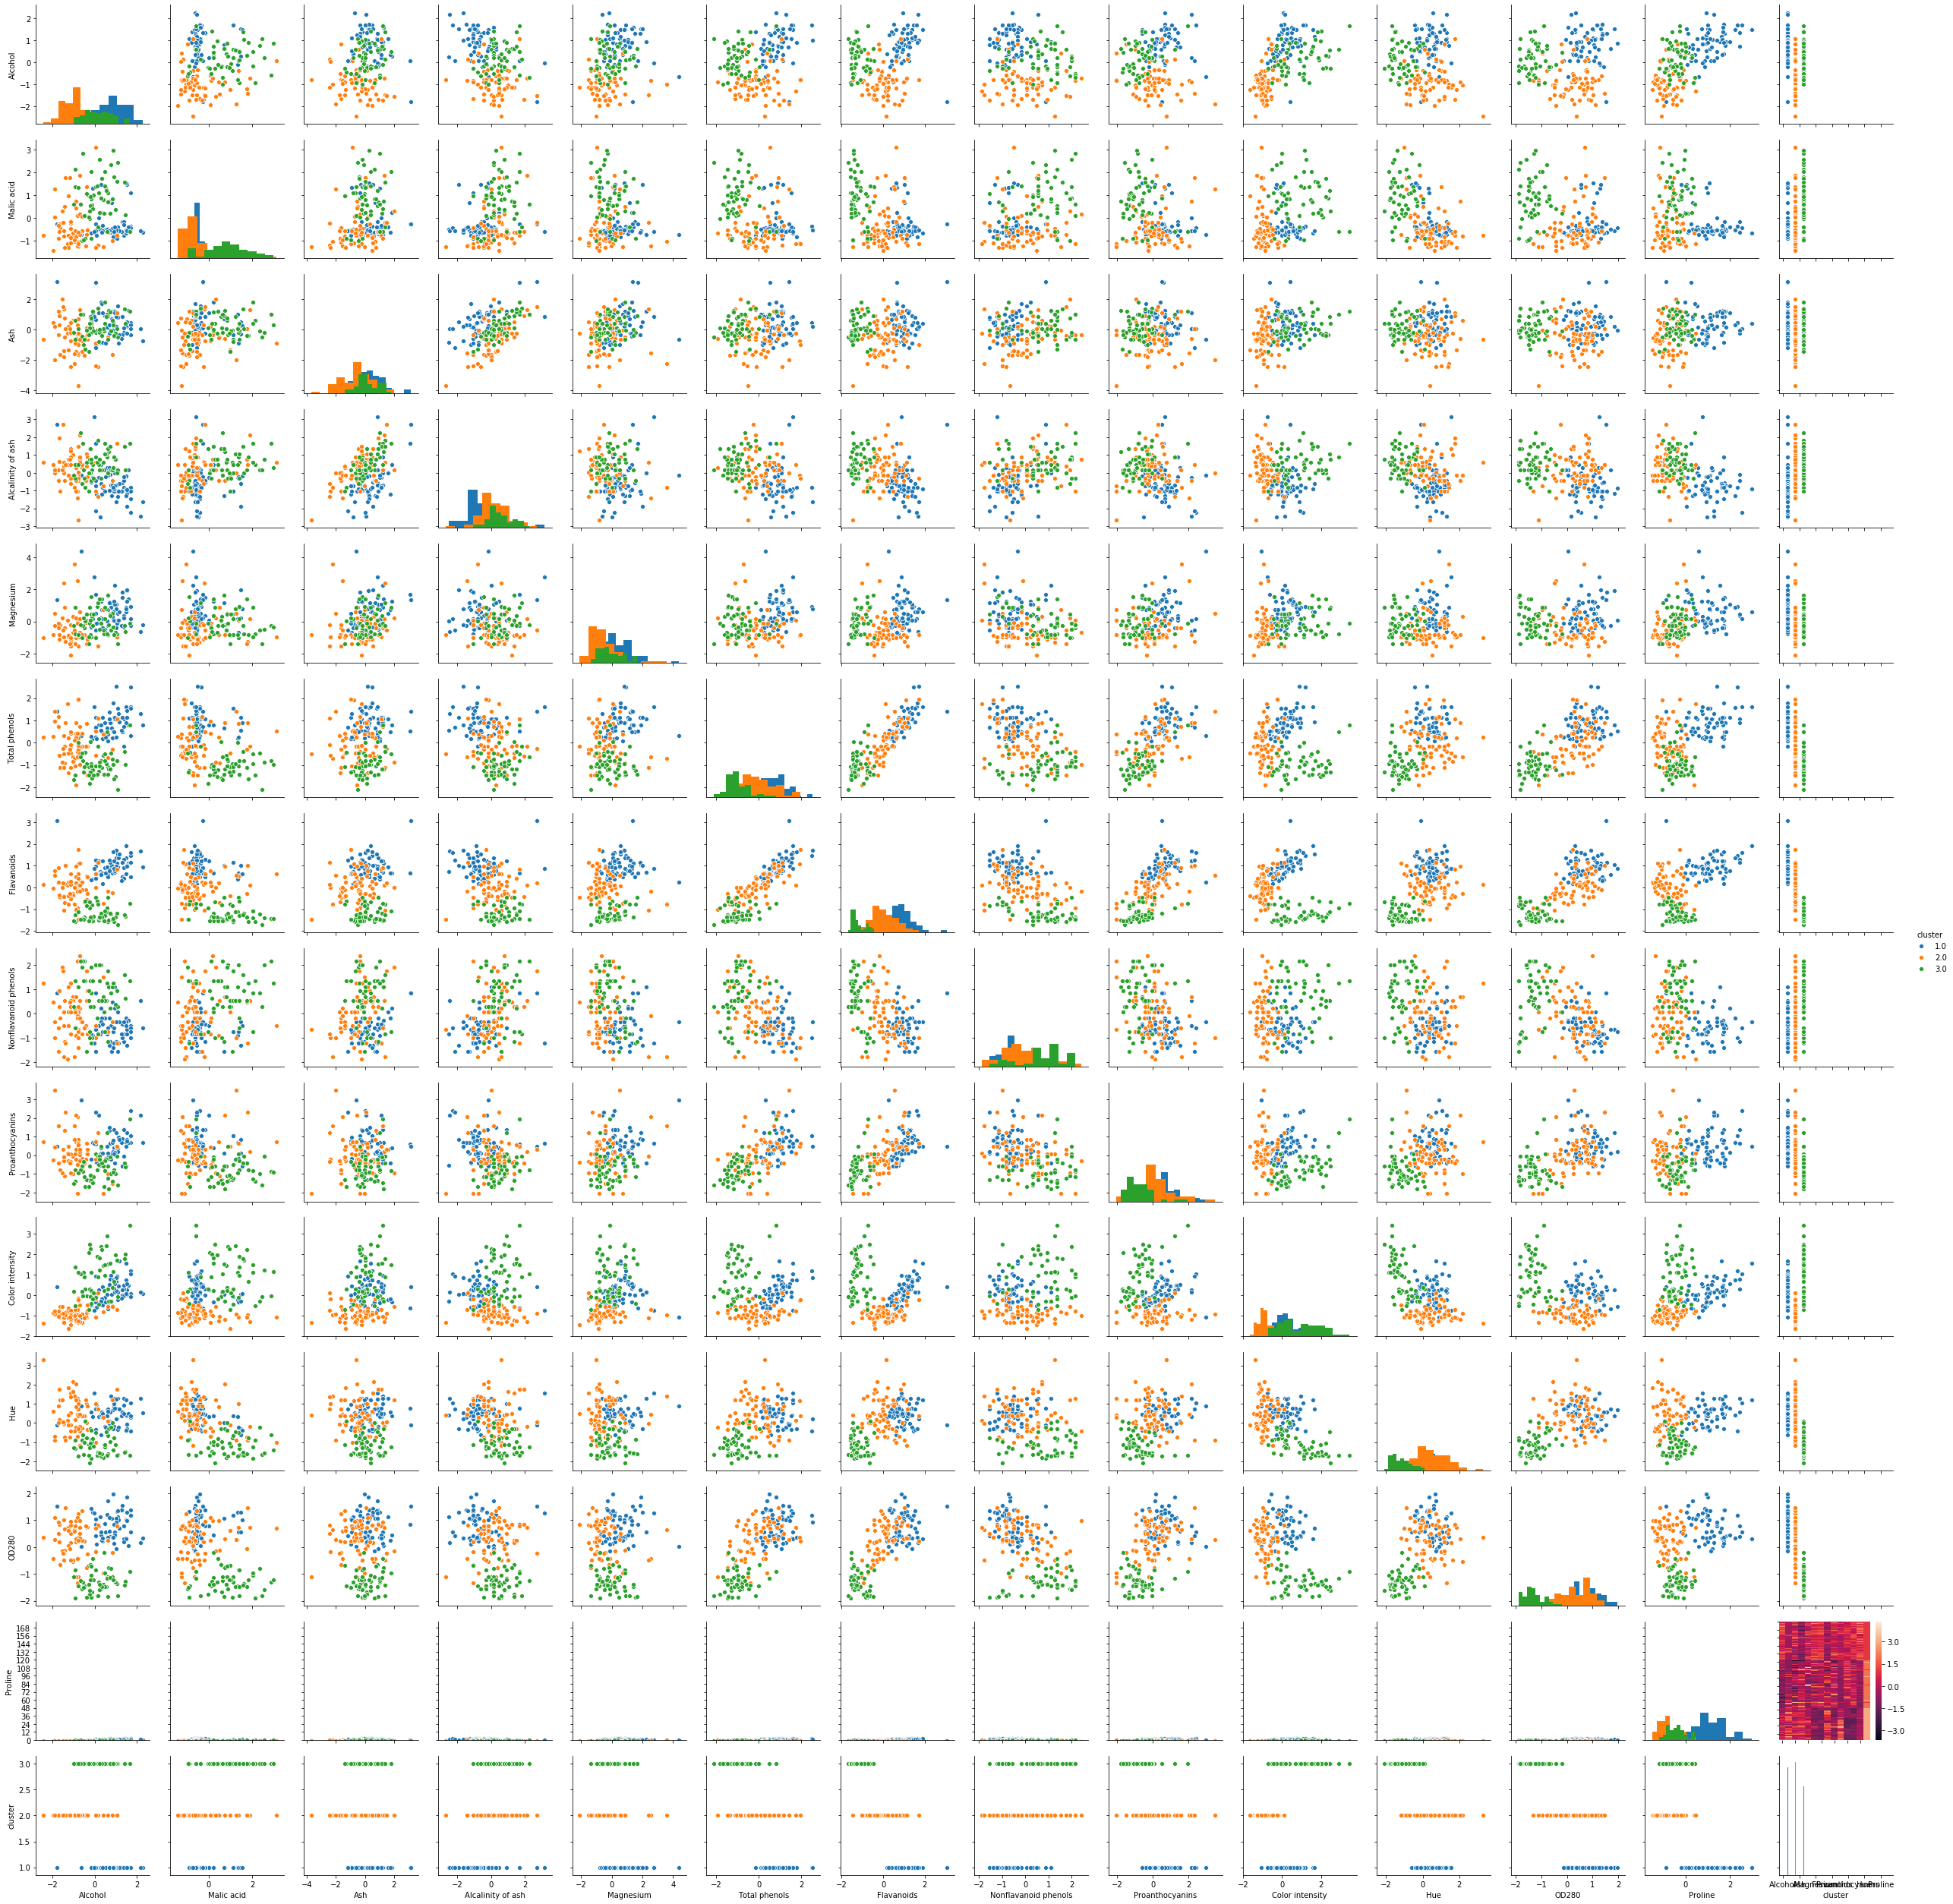

In [41]:
scaler = preprocessing.StandardScaler()
scaler.fit(df)
x_scaled= scaler.transform(df)
normalised = pd.DataFrame(x_scaled, columns = df.columns)


kmeansCluster = KMeans(n_clusters = 3, random_state = 1931273123)
res = kmeansCluster.fit_predict(normalised)

label_pred_KM = kmeansCluster.labels_ + 1

normalised["cluster"] = label_pred_KM.astype('float64')
sns_plot = sns.pairplot(normalised, hue = "cluster",diag_kind="hist")

sns.heatmap(normalised)

In [42]:
ars = adjusted_rand_score(label, label_pred_KM)
print(ars)

0.8974949815093207
